In [50]:
# import relevant modules
import numpy as np
import math
import matplotlib.pyplot as plt

In [51]:
# Define the ODE we wish to solve
def f(x,t):
    return x

In [52]:
# function that performs a single step of the euler method
# where f is the ODE, h is the time-step, and (x,t) are parameters of ODE
def euler_solve_step(f,h,t,x):
    x = x + h*f(x,t)
    return  x

In [53]:
# function that performs a single step of the 4th-order Runge-Kutta method
# where f is the ODE, h is the time-step, and (x,t) are parameters of ODE
def rk4_solve_step(f,h,t,x):
    k1 = f(x,t)
    k2 = f( x + h*(k1/2),t + h/2)
    k3 = f( x + h*(k2/2),t + h/2)
    k4 = f( x +h*k3,t + h)
    return  x + (1/6)*h*(k1 + 2*k2 + 2*k3 + k4)

In [54]:
# extention - implementing other 1-step integration methods

In [67]:
# function that performs a single step of the Heun's method method
# where f is the ODE, h is the time-step, and (x,t) are parameters of ODE

def heuns_solve_step(f,h,t,x):
    f1 = f(x,t)
    f2 = f( x + h*(2/3),t + h*(2/3)*f1)
    return  x + h*(f1 + 3*f2)/4

In [68]:
# function that performs a single step of the Midpoint method method
# where f is the ODE, h is the time-step, and (x,t) are parameters of ODE

def midpoint_solve_step(f,h,t,x):
    x = x + (h*f(x+(h/2), t +(h/2)*f(x,t)))
    return  x 

In [69]:
# function to solve steps
# where T is the maximum steps and solver can be specified (either euler_solve_step or rk4_solve_step)
def solve_to(f,h,t,x,T,solver):
   
    
    while t+h < T:
        x=solver(f,h,t,x)
        t = t + h
    if T!=t:
        x=solver(f,T-t,t,x)
        t = T
    return x

In [70]:
# function to solve the specified ODE and generate a series of numerical solution estimates
# uses function solve_to and either the euler method or Runge-kutta method can be specified
def solve_ode(f,h,t,x,L,solver):
    m = []
    
    for l in L:
        x = solve_to(f,h,t,x,l,solver)
        t=l
        m.append(x)
    error = abs(math.exp(l)-x)
    return m, error


In [71]:
solve_to(f,0.1,0,1,1,rk4_solve_step)

2.7182797441351663

In [72]:
solve_ode(f,0.1,0,1,[0.1,0.6,1],euler_solve_step)

([1.1, 1.7715610000000002, 2.5937424601000005], 0.12453936835904456)

Text(0, 0.5, 'error')

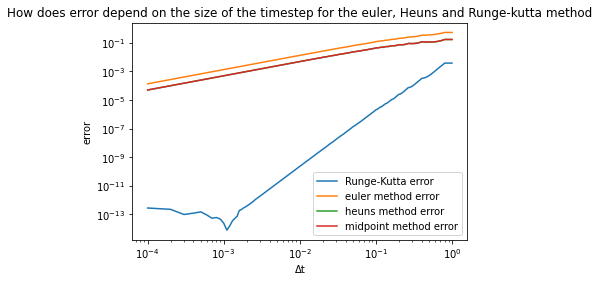

In [73]:
#Produce a plot with double logarithmic scale showing how the error depends on the size of the timestep 
# for the euler method, 4th order Runge-Kutta method, Heun's method and Midpoint method
error_euler = []
error_runga = []
error_heuns = []
error_midpoint = []
for h in np.arange(0.0001,1,0.0001):
    [a,b]= solve_ode(f,h,0,1,[0.1,0.9,1],euler_solve_step)
    [i,j]= solve_ode(f,h,0,1,[0.1,0.9,1],rk4_solve_step)
    [n,k]= solve_ode(f,h,0,1,[0.1,0.9,1],heuns_solve_step)
    [y,q]= solve_ode(f,h,0,1,[0.1,0.9,1],midpoint_solve_step)
    error_euler.append(b)
    error_runga.append(j)
    error_heuns.append(k)
    error_midpoint.append(q)

plt.loglog(np.arange(0.0001,1,0.0001), error_runga)
plt.loglog(np.arange(0.0001,1,0.0001), error_euler)
plt.loglog(np.arange(0.0001,1,0.0001), error_heuns)
plt.loglog(np.arange(0.0001,1,0.0001), error_midpoint)


plt.legend(['Runge-Kutta error','euler method error','heuns method error', 'midpoint method error'])
plt.title('How does error depend on the size of the timestep for the euler, Heuns and Runge-kutta method')
plt.xlabel('\u0394t')
plt.ylabel('error')


In [62]:
# Define a system of ODEs

def fun(X,t,):
    x = X[0]
    y = X[-1]
    return np.array([y,-x])

In [63]:
# function to solve systems of ODEs
# 
def solve_ode_system(fun,h,t,X,L,solver):
    m = []
    for l in L:
        X = solve_to(fun,h,t,X,l,solver)
        t=l
        m.append(X)
    return m



In [64]:
solve_ode_system(fun,0.1,0,[1,1],[0.3,0.9,1],euler_solve_step)

[array([1.269, 0.671]),
 array([ 1.46977249, -0.16474031]),
 array([ 1.45329846, -0.31171756])]

Text(0.5, 1.0, 'Graph displaying the solution of the system of ODEs')

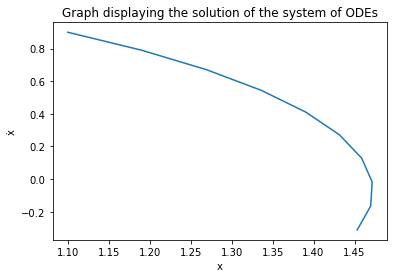

In [66]:
#Plotting the results of system of ODEs
results = solve_ode_system(fun,0.1,0,[1,1],[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],euler_solve_step)
plt.plot([state[0] for state in results],[state[1] for state in results])
plt.xlabel('x')
plt.ylabel('x\u0307')
plt.title('Graph displaying the solution of the system of ODEs')


